# 1. Nhập thư viện xử lý

In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 2. Tiền xử lý dữ liệu

In [58]:
# Đọc dữ liệu từ file CSV
# Sử dụng encoding='ISO-8859-1' khi tệp chứa ký tự không tương thích với 'utf-8'. Mã hóa này hỗ trợ các ký tự đặc biệt từ các ngôn ngữ châu Âu, giúp tránh lỗi giải mã khi đọc tệp có ký tự đặc biệt như á, é, hoặc các ký tự từ hệ thống cũ.
df = pd.read_csv('LogisticDataset.csv', encoding='ISO-8859-1')
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [59]:
# Kiểm tra các cột có trong DataFrame
print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [60]:
# Liệt kê các cột bạn muốn loại bỏ
columns_to_drop = [
    'Type', 'Benefit per order', 'Customer City', 'Customer Country',
    'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Segment',
    'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id',
    'Department Name', 'Latitude', 'Longitude', 'Market', 'Order Country',
    'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
    'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio',
    'Order Profit Per Order', 'Order State', 'Product Card Id', 'Product Category Id',
    'Product Price', 'Product Status', 'shipping date (DateOrders)','Customer Password', 
    'Product Image', 'Customer Email', 'Product Description','Order Zipcode','Order Status'
]

# Loại bỏ các cột không cần thiết và tạo DataFrame mới
data = df.drop(columns=columns_to_drop)

In [61]:
# Kiểm tra lại cột dữ liệu sau khi đã xử lý
print(data.columns)

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Order City', 'order date (DateOrders)',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Region', 'Product Name', 'Shipping Mode'],
      dtype='object')


In [62]:
# Kiểm tra lại dữ liệu
data.head(50)

,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Order City,order date (DateOrders),Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Region,Product Name,Shipping Mode
0,3,4,314.640015,Advance shipping,0,73,Sporting Goods,Bekasi,1/31/2018 22:56,327.750000,1,327.750000,314.640015,Southeast Asia,Smart watch,Standard Class
1,5,4,311.359985,Late delivery,1,73,Sporting Goods,Bikaner,1/13/2018 12:27,327.750000,1,327.750000,311.359985,South Asia,Smart watch,Standard Class
2,4,4,309.720001,Shipping on time,0,73,Sporting Goods,Bikaner,1/13/2018 12:06,327.750000,1,327.750000,309.720001,South Asia,Smart watch,Standard Class
3,3,4,304.809998,Advance shipping,0,73,Sporting Goods,Townsville,1/13/2018 11:45,327.750000,1,327.750000,304.809998,Oceania,Smart watch,Standard Class
4,2,4,298.250000,Advance shipping,0,73,Sporting Goods,Townsville,1/13/2018 11:24,327.750000,1,327.750000,298.250000,Oceania,Smart watch,Standard Class
5,6,4,294.980011,Shipping canceled,0,73,Sporting Goods,Toowoomba,1/13/2018 11:03,327.750000,1,327.750000,294.980011,Oceania,Smart watch,Standard Class
6,2,1,288.420013,Late delivery,1,73,Sporting Goods,Guangzhou,1/13/2018 10:42,327.750000,1,327.750000,288.420013,Eastern Asia,Smart watch,First Class
7,2,1,285.140015,Late delivery,1,73,Sporting Goods,Guangzhou,1/13/2018 10:21,327.750000,1,327.750000,285.140015,Eastern Asia,Smart watch,First Class
8,3,2,278.589996,Late delivery,1,73,Sporting Goods,Guangzhou,1/13/2018 10:00,327.750000,1,327.750000,278.589996,Eastern Asia,Smart watch,Second Class
9,2,1,275.309998,Late delivery,1,73,Sporting Goods,Guangzhou,1/13/2018 9:39,327.750000,1,327.750000,275.309998,Eastern Asia,Smart watch,First Class


In [63]:
# Kiểm tra cấu trúc dữ liệu
print(data.shape)

(180519, 16)


In [64]:
# Kiểm tra thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Sales per customer             180519 non-null  float64
 3   Delivery Status                180519 non-null  object 
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Id                    180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Order City                     180519 non-null  object 
 8   order date (DateOrders)        180519 non-null  object 
 9   Order Item Product Price       180519 non-null  float64
 10  Order Item Quantity            180519 non-null  int64  
 11  Sales                          180519 non-null  float64
 12  Order Item Total              

In [65]:
# Mô tả dữ liệu
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Category Id,Order Item Product Price,Order Item Quantity,Sales,Order Item Total
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,183.107609,0.548291,31.851451,141.232550,2.127638,203.772096,183.107609
std,1.623722,1.374449,120.043670,0.497664,15.640064,139.732492,1.453451,132.273077,120.043670
min,0.000000,0.000000,7.490000,0.000000,2.000000,9.990000,1.000000,9.990000,7.490000
25%,2.000000,2.000000,104.379997,0.000000,18.000000,50.000000,1.000000,119.980003,104.379997
50%,3.000000,4.000000,163.990005,1.000000,29.000000,59.990002,1.000000,199.919998,163.990005
75%,5.000000,4.000000,247.399994,1.000000,45.000000,199.990005,3.000000,299.950012,247.399994
max,6.000000,4.000000,1939.989990,1.000000,76.000000,1999.989990,5.000000,1999.989990,1939.989990


In [66]:
# Kiểm tra số lượng giá trị null trong mỗi cột
null_counts = data.isnull().sum()

# Chỉ ra các cột có giá trị null
columns_with_nulls = null_counts[null_counts > 0]

# In ra các giá trị null
print("Số lượng giá trị null trong mỗi cột:")
print(null_counts)
print("\nCác cột có giá trị null:")
print(columns_with_nulls)

Số lượng giá trị null trong mỗi cột:
Days for shipping (real)         0
Days for shipment (scheduled)    0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Order City                       0
order date (DateOrders)          0
Order Item Product Price         0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Region                     0
Product Name                     0
Shipping Mode                    0
dtype: int64

Các cột có giá trị null:
Series([], dtype: int64)


In [67]:
# Tìm các dòng trùng lặp
duplicated_rows = [data.duplicated()]
print(duplicated_rows)

[0         False
1         False
2         False
3         False
4         False
          ...  
180514    False
180515    False
180516    False
180517    False
180518    False
Length: 180519, dtype: bool]


# 3. Tính toán tỷ lệ phần trăm tích lũy của tổng doanh thu đóng góp của từng loại sản phẩm

In [117]:
# Tạo DataFrame mới với hai cột 'Category Name' và 'Sales'
data_2 = data[['Category Name', 'Sales']]

In [119]:
# Hiển thị DataFrame mới
data_2.head(40)

,Category Name,Sales
138834,Fishing,399.980011
137151,Fishing,399.980011
136945,Fishing,399.980011
136946,Fishing,399.980011
136947,Fishing,399.980011
136948,Fishing,399.980011
136949,Fishing,399.980011
136950,Fishing,399.980011
136951,Fishing,399.980011
136952,Fishing,399.980011


In [120]:
# Phân loại từng sản phẩm theo 'Category Name' và cộng tổng sale cho mỗi loại
sales_by_category = data_2.groupby('Category Name')['Sales'].sum().reset_index()

In [121]:
# Đổi tên cột kết quả cho rõ ràng
sales_by_category.columns = ['Category Name', 'Total Sales']

In [123]:
# Hiển thị kết quả
sales_by_category

,Category Name,Total Sales
0,Accessories,1.784286e+04
1,As Seen on TV!,2.059794e+04
2,Baby,1.222956e+04
3,Baseball & Softball,2.199690e+04
4,Basketball,2.709933e+04
5,Books,1.258740e+04
6,Boxing & MMA,4.540713e+04
7,CDs,3.059590e+03
8,Cameras,2.676077e+05
9,Camping & Hiking,1.160023e+06


In [142]:
# Sắp xếp từ cao tới thấp theo 'Total Sales'
sales_by_category_sorted = sales_by_category.sort_values(by='Total Sales', ascending=False)

In [143]:
# Hiển thị kết quả đã sắp xếp
sales_by_category_sorted

,Category Name,Total Sales
18,Fishing,1.900305e+06
12,Cleats,1.199022e+06
9,Camping & Hiking,1.160023e+06
10,Cardio Equipment,1.016089e+06
46,Water Sports,8.701568e+05
47,Women's Apparel,8.628500e+05
34,Men's Footwear,7.963188e+05
30,Indoor/Outdoor Games,7.761894e+05
13,Computers,6.630000e+05
38,Shop By Sport,3.659420e+05


In [144]:
# Tính tổng doanh thu của tất cả các loại sản phẩm
total_sales = sales_by_category_sorted['Total Sales'].sum()

# Tính tỷ lệ phần trăm đóng góp của từng loại sản phẩm
sales_by_category_sorted['Percentage'] = (sales_by_category_sorted['Total Sales'] / total_sales) * 100

# Tính tỷ lệ phần trăm tích lũy (cumulative percentage)
sales_by_category_sorted['Cumulative Percentage'] = sales_by_category_sorted['Percentage'].cumsum()

# Hiển thị kết quả
sales_by_category_sorted[['Category Name', 'Total Sales', 'Percentage', 'Cumulative Percentage']]

,Category Name,Total Sales,Percentage,Cumulative Percentage
18,Fishing,1.900305e+06,16.092775,16.092775
12,Cleats,1.199022e+06,10.153941,26.246715
9,Camping & Hiking,1.160023e+06,9.823678,36.070393
10,Cardio Equipment,1.016089e+06,8.604770,44.675163
46,Water Sports,8.701568e+05,7.368942,52.044105
47,Women's Apparel,8.628500e+05,7.307064,59.351169
34,Men's Footwear,7.963188e+05,6.743643,66.094812
30,Indoor/Outdoor Games,7.761894e+05,6.573177,72.667989
13,Computers,6.630000e+05,5.614630,78.282619
38,Shop By Sport,3.659420e+05,3.098988,81.381607


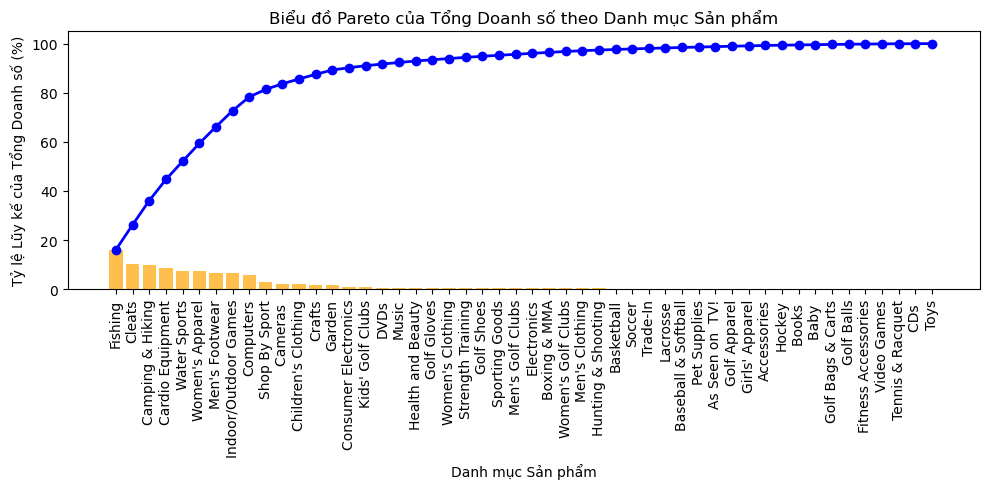

In [152]:
# Plot Pareto chart with bar and line graph
plt.figure(figsize=(10, 5))

# Bar chart for percentage
plt.bar(sales_by_category_sorted['Category Name'], 
        sales_by_category_sorted['Percentage'], 
        color='orange', alpha=0.7)

# Line chart for cumulative percentage
plt.plot(sales_by_category_sorted['Category Name'], 
         sales_by_category_sorted['Cumulative Percentage'], 
         color='blue', marker='o', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Danh mục Sản phẩm')
plt.ylabel('Tỷ lệ Lũy kế của Tổng Doanh số (%)')
plt.title('Biểu đồ Pareto của Tổng Doanh số theo Danh mục Sản phẩm')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

# 4. Tính toán độ co dãn của cầu trong doanh thu

In [72]:
# Chuyển đổi cột 'order date (DateOrders)' sang định dạng ngày giờ
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Bây giờ, lọc dữ liệu cho năm 2017 và kiểm tra nếu các cột khác có giá trị không null
data = data[(data['order date (DateOrders)'].dt.year == 2017) &
            data['Product Name'].notnull() &
            data['Order Item Product Price'].notnull() &
            data['Order Item Quantity'].notnull()]

In [73]:
# Chia dữ liệu thành hai khoảng thời gian
data_first_half = data[data['order date (DateOrders)'].dt.month <= 6]
data_second_half = data[data['order date (DateOrders)'].dt.month > 6]

In [74]:
# Nhóm theo tên sản phẩm và tính tổng số lượng và giá trung bình
def calculate_ped(data):
    grouped = data.groupby('Product Name').agg({
        'Order Item Quantity': 'sum',
        'Order Item Product Price': 'mean'
    }).reset_index()
    return grouped

In [75]:
# Tính PED cho cả hai khoảng thời gian
first_half_ped = calculate_ped(data_first_half)
second_half_ped = calculate_ped(data_second_half)

In [76]:
# Gộp dữ liệu PED để so sánh
comparison = pd.merge(first_half_ped, second_half_ped, on='Product Name', suffixes=('_first', '_second'))

# Tính phần trăm thay đổi về số lượng và giá
comparison['quantity_change'] = ((comparison['Order Item Quantity_second'] - comparison['Order Item Quantity_first']) / 
                                 comparison['Order Item Quantity_first']) * 100

comparison['price_change'] = ((comparison['Order Item Product Price_second'] - comparison['Order Item Product Price_first']) / 
                              comparison['Order Item Product Price_first']) * 100

# Loại bỏ những dòng mà sự thay đổi giá là 0 để tránh chia cho 0
comparison = comparison[comparison['price_change'] != 0]

# Tính PED
comparison['PED'] = comparison['quantity_change'] / comparison['price_change']

# Lọc các thay đổi đáng kể (PED > 1)
significant_changes = comparison[abs(comparison['PED']) > 1]

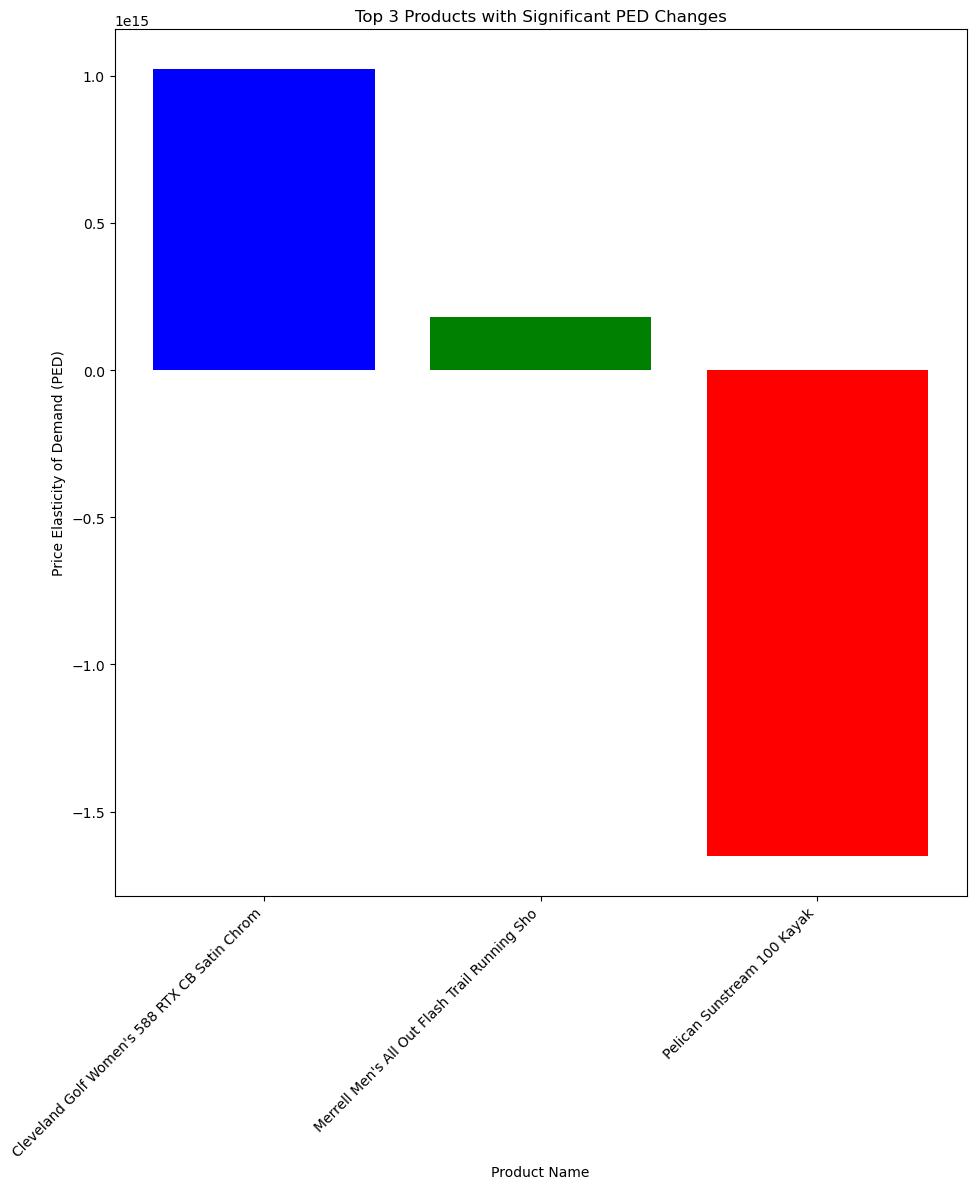

In [77]:
# Vẽ biểu đồ thể hiện kết quả
plt.figure(figsize=(10, 12))
plt.bar(significant_changes['Product Name'], significant_changes['PED'], color=['blue', 'green', 'red'])
plt.xlabel('Product Name')
plt.ylabel('Price Elasticity of Demand (PED)')
plt.title('Top 3 Products with Significant PED Changes')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trên trục x để dễ đọc hơn
plt.tight_layout()
plt.show()

# 5. Vẽ biểu đồ thể hiện độ trễ theo từng khu vực và phương thức giao hàng

In [78]:
# Chuyển cột giao hàng trễ thành biến nhị phân, giả định 'Late_delivery_risk' chỉ ra nếu lô hàng bị trễ
data['Is_Late'] = data['Late_delivery_risk'].apply(lambda x: 'Trễ' if x == 1 else 'Đúng giờ')

In [79]:
# Nhóm dữ liệu để đếm các trường hợp
region_mode_lateness = data.groupby(['Order Region', 'Shipping Mode', 'Is_Late']).size().unstack().fillna(0)

In [80]:
# Chuẩn hóa dữ liệu để hiển thị tỷ lệ thay vì số lượng
region_mode_lateness_prop = region_mode_lateness.div(region_mode_lateness.sum(axis=1), axis=0)

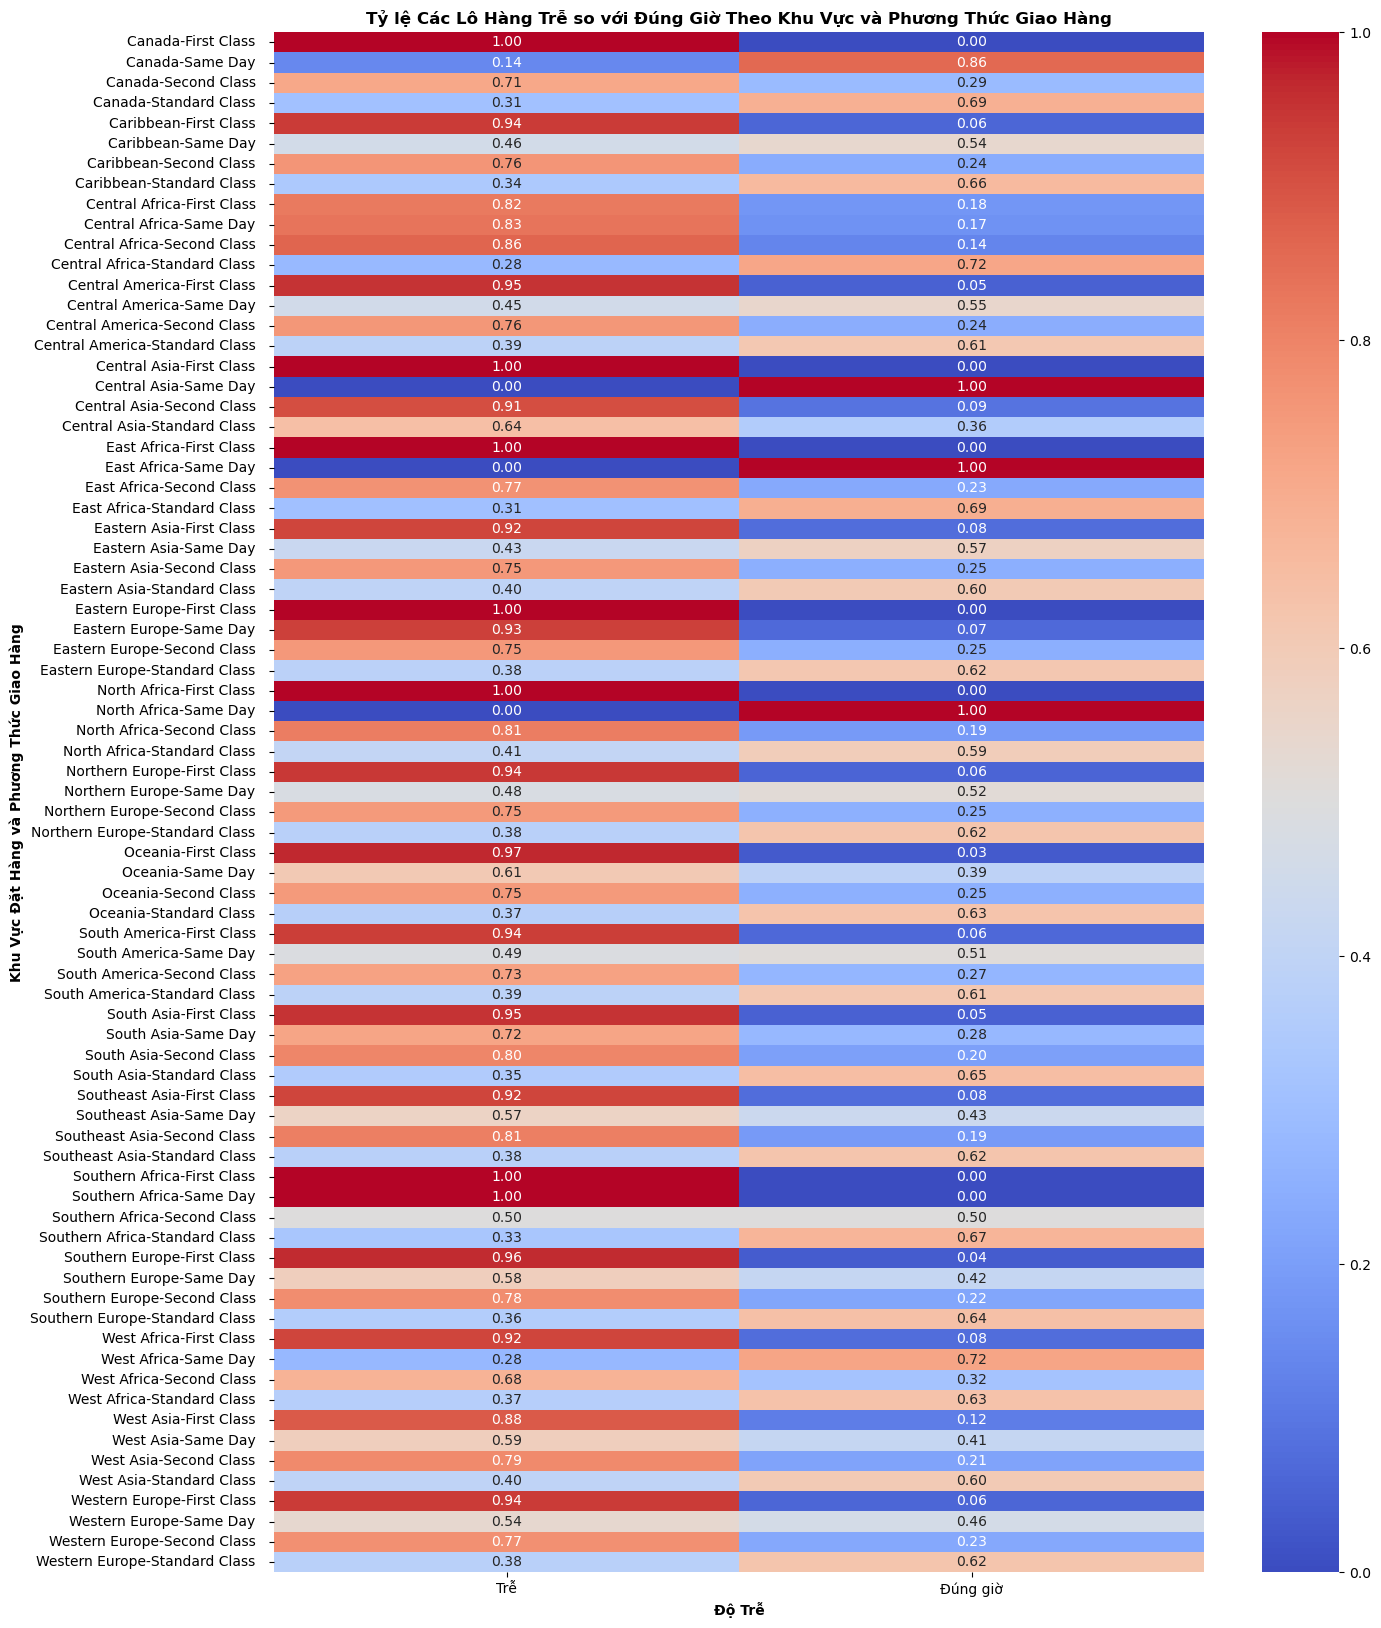

In [81]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(15, 20))  

# Vẽ biểu đồ nhiệt
ax = sns.heatmap(region_mode_lateness_prop, annot=True, cmap='coolwarm', fmt=".2f")

# Đặt tiêu đề cho biểu đồ với kiểu chữ đậm
plt.title('Tỷ lệ Các Lô Hàng Trễ so với Đúng Giờ Theo Khu Vực và Phương Thức Giao Hàng', fontweight='bold')

# Đặt nhãn cho các trục
plt.ylabel('Khu Vực Đặt Hàng và Phương Thức Giao Hàng', fontweight='bold')
plt.xlabel('Độ Trễ', fontweight='bold')

# Điều chỉnh nhãn trục y
plt.yticks(rotation=0)  # Đặt nhãn trục y không xoay

# Tùy chỉnh khoảng cách giữa các nhãn trên trục y để cải thiện độ rõ ràng
ax.yaxis.set_tick_params(pad=10)  # Tăng khoảng cách padding cho mỗi nhãn

# Hiển thị biểu đồ
plt.show()

# 6. Chi tiết từng khu vực theo tỷ lệ

<Figure size 1200x1000 with 0 Axes>

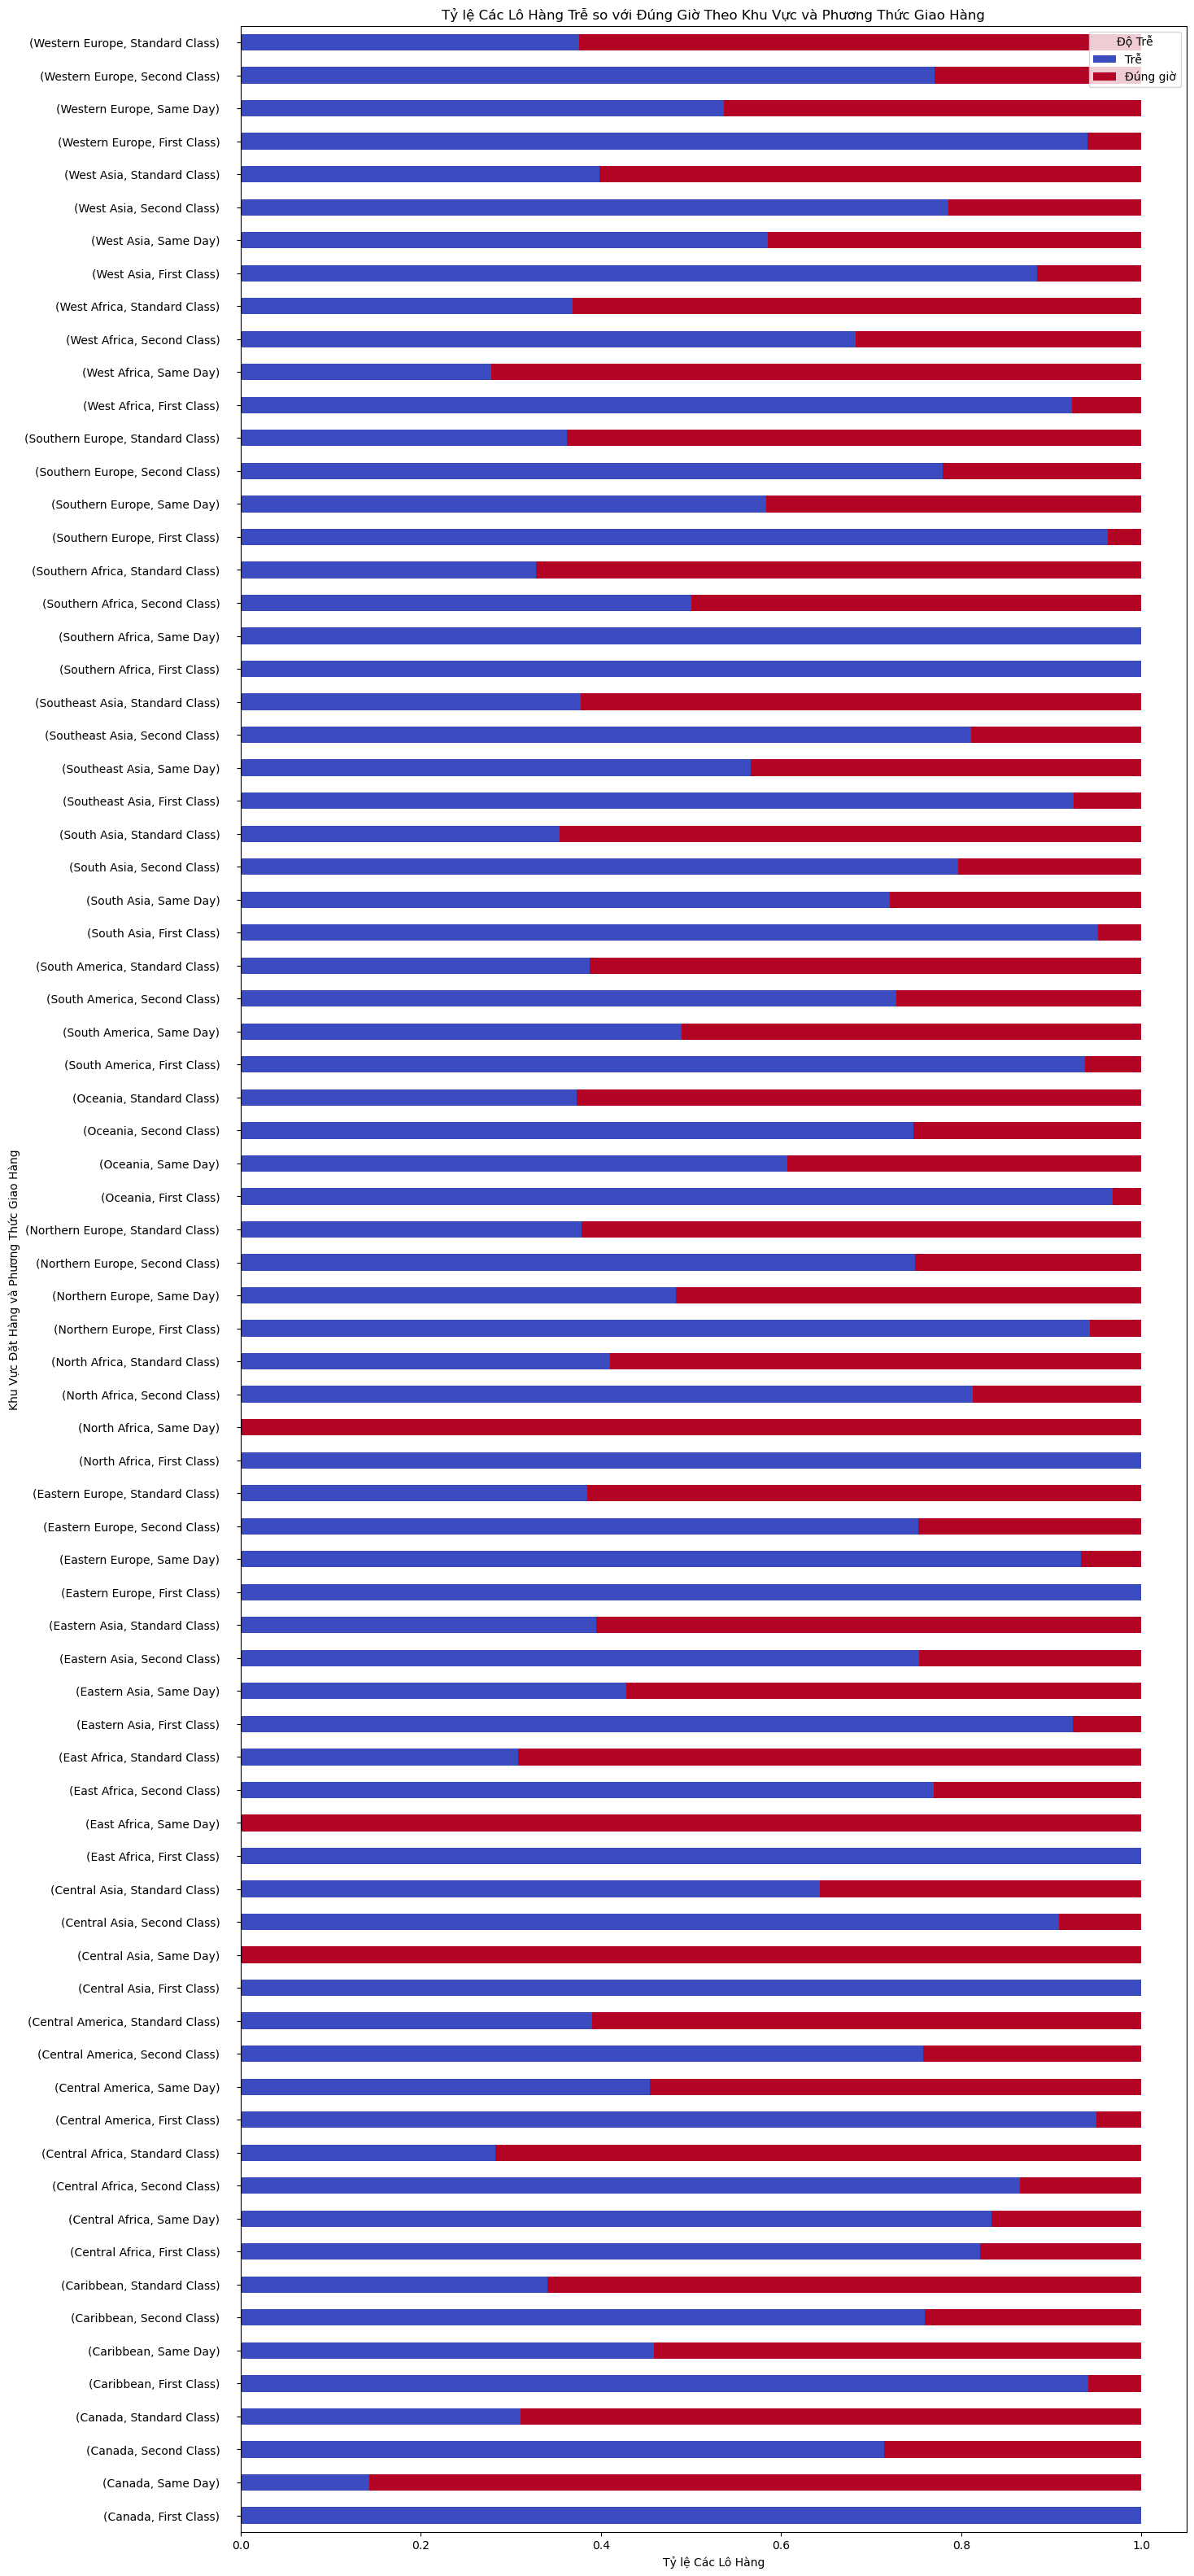

In [82]:
# Giả sử 'region_mode_lateness_prop' là DataFrame đã được chuẩn bị sẵn
plt.figure(figsize=(12, 10))  # Tăng kích thước biểu đồ để cải thiện khoảng cách giữa các nhãn

# Vẽ biểu đồ cột xếp chồng
ax = region_mode_lateness_prop.plot(kind='barh', stacked=True, colormap='coolwarm', figsize=(15, 40))

# Đặt tiêu đề cho biểu đồ
plt.title('Tỷ lệ Các Lô Hàng Trễ so với Đúng Giờ Theo Khu Vực và Phương Thức Giao Hàng')

# Đặt nhãn cho các trục
plt.xlabel('Tỷ lệ Các Lô Hàng')
plt.ylabel('Khu Vực Đặt Hàng và Phương Thức Giao Hàng')

# Điều chỉnh nhãn trục y
plt.yticks(rotation=0)  # Đặt nhãn trục y không xoay

# Tùy chỉnh khoảng cách giữa các nhãn trên trục y để cải thiện độ rõ ràng
ax.yaxis.set_tick_params(pad=15)  # Tăng khoảng cách padding cho mỗi nhãn

# Đặt chú giải
plt.legend(title='Độ Trễ')

# Hiển thị biểu đồ
plt.show()

# 7. Phân tích các yếu tố ảnh hưởng tới việc trễ giao hàng bằng mô hinh hôì quy

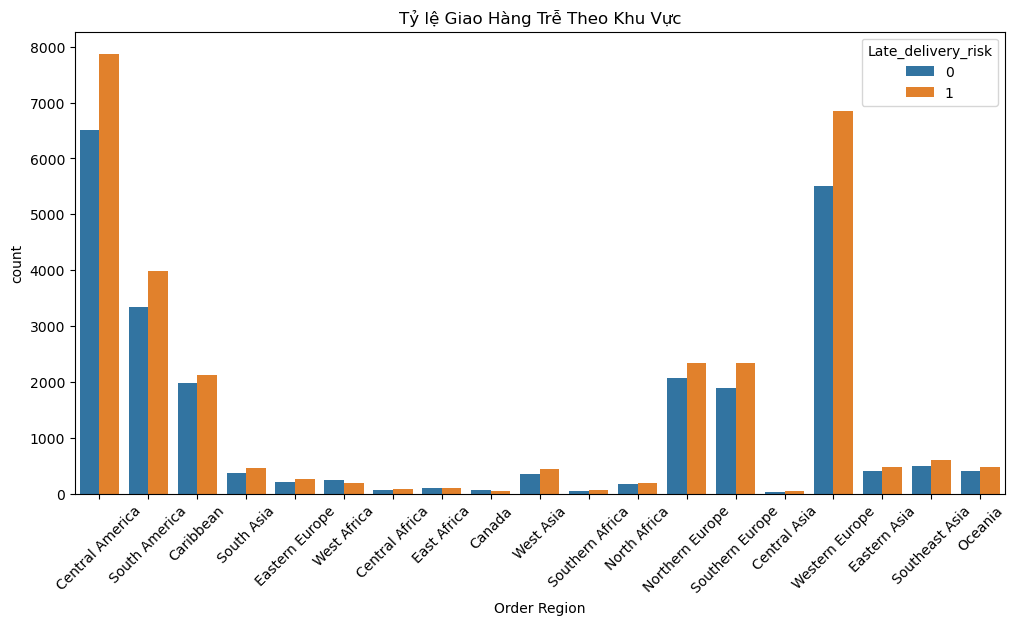

In [83]:
# Đánh giá sơ bộ dữ liệu về tỷ lệ trễ theo khu vực
plt.figure(figsize=(12, 6))
sns.countplot(x='Order Region', hue='Late_delivery_risk', data=data)
plt.title('Tỷ lệ Giao Hàng Trễ Theo Khu Vực')
plt.xticks(rotation=45)
plt.show()

In [84]:
# Tạo một bản sao của DataFrame để giữ nguyên dữ liệu gốc
data_copy = data.copy()

In [85]:
# Bây giờ 'data_copy' chứa các biến dummy và 'data' vẫn giữ nguyên không thay đổi
print(data_copy.head(10))  # Xem 5 dòng đầu của bản sao để kiểm tra các biến dummy

        Days for shipping (real)  Days for shipment (scheduled)  \
138834                         4                              4   
138843                         3                              4   
138842                         6                              4   
138841                         2                              1   
138840                         2                              2   
138839                         4                              4   
138838                         4                              4   
138837                         2                              2   
138836                         3                              4   
138835                         2                              1   

        Sales per customer   Delivery Status  Late_delivery_risk  Category Id  \
138834          359.980011  Shipping on time                   0           45   
138843          399.980011  Advance shipping                   0           45   
138842          299

In [86]:
# Lấy ra các cột cần thiết từ 'data_copy'
columns_needed = ['Delivery Status', 'Order Region', 'Shipping Mode', 'Late_delivery_risk','Order Item Quantity', 'Sales']
data_selected = data_copy[columns_needed]

In [87]:
# Hiển thị kết quả
data_selected.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
138834,Shipping on time,Central America,Standard Class,0,1,399.980011
138843,Advance shipping,Central America,Standard Class,0,1,399.980011
138842,Late delivery,Central America,Standard Class,1,1,399.980011
138841,Late delivery,South America,First Class,1,1,399.980011
138840,Shipping on time,Central America,Second Class,0,1,399.980011
138839,Shipping on time,Caribbean,Standard Class,0,1,399.980011
138838,Shipping on time,Caribbean,Standard Class,0,1,399.980011
138837,Shipping on time,Central America,Second Class,0,1,399.980011
138836,Advance shipping,South America,Standard Class,0,1,399.980011
138835,Late delivery,Central America,First Class,1,1,399.980011


In [88]:
# Lọc bỏ các hàng có giá trị 'Shipping canceled' trong cột 'Delivery Status'
data_filtered = data_selected.query('`Delivery Status` != "Shipping canceled"')

In [89]:
# Hiển thị 50 dòng đầu tiên sau khi lọc
data_filtered.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
138834,Shipping on time,Central America,Standard Class,0,1,399.980011
138843,Advance shipping,Central America,Standard Class,0,1,399.980011
138842,Late delivery,Central America,Standard Class,1,1,399.980011
138841,Late delivery,South America,First Class,1,1,399.980011
138840,Shipping on time,Central America,Second Class,0,1,399.980011
138839,Shipping on time,Caribbean,Standard Class,0,1,399.980011
138838,Shipping on time,Caribbean,Standard Class,0,1,399.980011
138837,Shipping on time,Central America,Second Class,0,1,399.980011
138836,Advance shipping,South America,Standard Class,0,1,399.980011
138835,Late delivery,Central America,First Class,1,1,399.980011


In [90]:
# In kiểu dữ liệu của tất cả các cột
print(data_filtered.dtypes)

Delivery Status         object
Order Region            object
Shipping Mode           object
Late_delivery_risk       int64
Order Item Quantity      int64
Sales                  float64
dtype: object


In [91]:
# Tạo đối tượng LabelEncoder
le = LabelEncoder()

In [92]:
# Chuyển đổi các cột bằng Label Encoding
data_filtered['Delivery Status'] = le.fit_transform(data_filtered['Delivery Status'])
data_filtered['Shipping Mode'] = le.fit_transform(data_filtered['Shipping Mode'])

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_73656/4153188858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Delivery Status'] = le.fit_transform(data_filtered['Delivery Status'])
/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_73656/4153188858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Shipping Mode'] = le.fit_transform(data_filtered['Shipping Mode'])


In [93]:
# Tạo thứ tự ưu tiên cho 'Order Region'
priority_order = [
    'Central America', 'Western Europe', 'South America', 'Northern Europe', 
    'Central Africa', 'Caribbean', 'Eastern Asia', 'South Asia', 'Southeast Asia', 
    'Oceania', 'West Asia', 'Eastern Europe', 'Southern Europe', 
    'Central Asia', 'Canada', 'Southern Africa'
]

# Tạo từ điển ánh xạ giá trị trong cột 'Order Region' thành số tương ứng theo thứ tự ưu tiên
priority_mapping = {region: idx for idx, region in enumerate(priority_order)}

# Chuyển đổi cột 'Order Region' bằng cách sử dụng ánh xạ thứ tự ưu tiên
data_filtered['Order Region'] = data_filtered['Order Region'].map(priority_mapping)

# Kiểm tra kết quả sau khi mã hóa
data_filtered[['Order Region']].head(10)

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_73656/1274445435.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Order Region'] = data_filtered['Order Region'].map(priority_mapping)


,Order Region
138834,0.0
138843,0.0
138842,0.0
138841,2.0
138840,0.0
138839,5.0
138838,5.0
138837,0.0
138836,2.0
138835,0.0


In [94]:
# Hiển thị kết quả sau khi mã hóa
data_filtered.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
138834,2,0.0,3,0,1,399.980011
138843,0,0.0,3,0,1,399.980011
138842,1,0.0,3,1,1,399.980011
138841,1,2.0,0,1,1,399.980011
138840,2,0.0,2,0,1,399.980011
138839,2,5.0,3,0,1,399.980011
138838,2,5.0,3,0,1,399.980011
138837,2,0.0,2,0,1,399.980011
138836,0,2.0,3,0,1,399.980011
138835,1,0.0,0,1,1,399.980011


In [95]:
# Lọc ra các dòng có giá trị NaN trong cột 'Order Region'
rows_with_nan_order_region = data_filtered[data_filtered['Order Region'].isna()]

# Hiển thị các dòng bị NaN trong cột 'Order Region'
rows_with_nan_order_region

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
145614,1,NaN,3,1,1,399.980011
145613,1,NaN,3,1,1,399.980011
145612,1,NaN,3,1,1,399.980011
145609,1,NaN,3,1,1,399.980011
145606,0,NaN,3,0,1,399.980011
...,...,...,...,...,...,...
161508,0,NaN,3,0,3,104.970001
171166,0,NaN,3,0,2,69.980003
27433,2,NaN,3,0,5,174.949997
58904,1,NaN,0,1,2,69.980003


In [96]:
# Loại bỏ các giá trị NaN trong các cột cần thiết
imputer = SimpleImputer(strategy='mean')
X = data_filtered.drop(columns=['Late_delivery_risk'])  # Xóa cột mục tiêu
X = imputer.fit_transform(X)
y = data_filtered['Late_delivery_risk']

In [97]:
# Hiển thị kết quả sau khi mã hóa
data_filtered.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
138834,2,0.0,3,0,1,399.980011
138843,0,0.0,3,0,1,399.980011
138842,1,0.0,3,1,1,399.980011
138841,1,2.0,0,1,1,399.980011
138840,2,0.0,2,0,1,399.980011
138839,2,5.0,3,0,1,399.980011
138838,2,5.0,3,0,1,399.980011
138837,2,0.0,2,0,1,399.980011
138836,0,2.0,3,0,1,399.980011
138835,1,0.0,0,1,1,399.980011


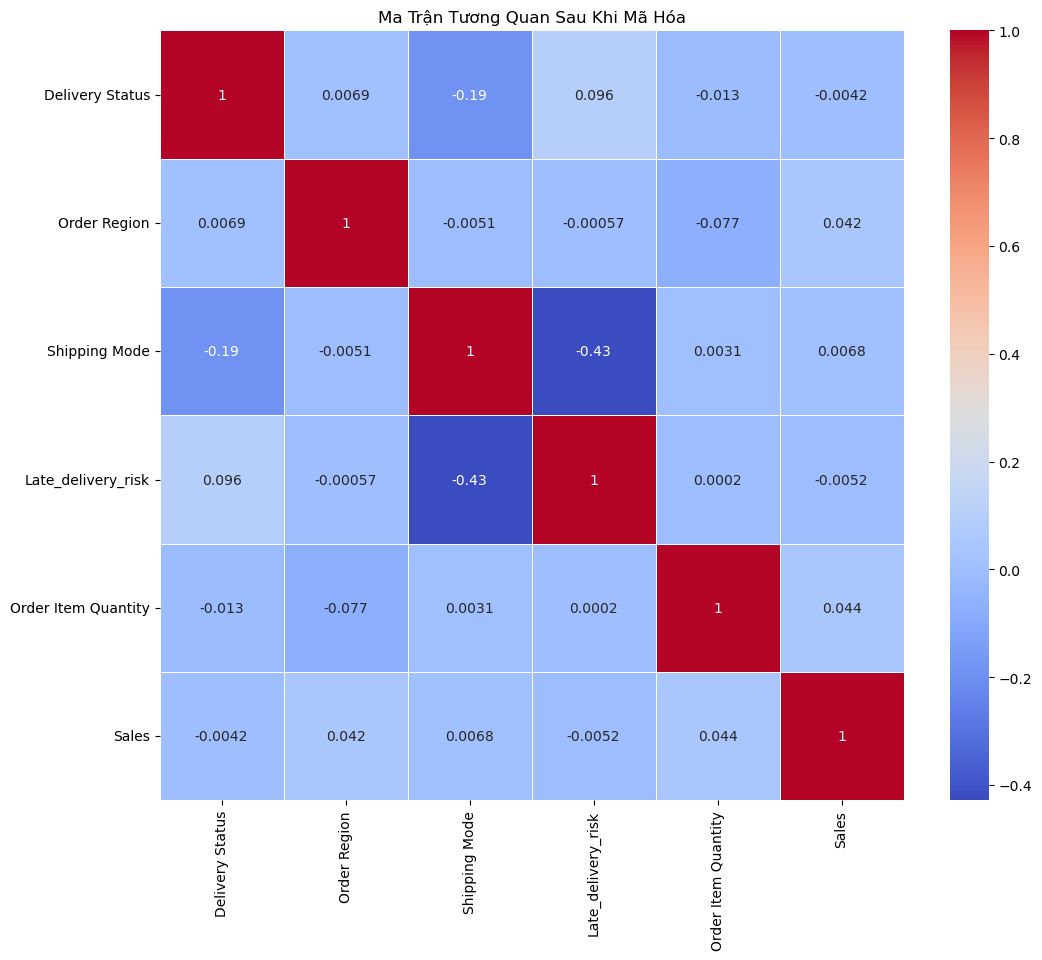

In [98]:
# Tính ma trận tương quan giữa các biến số sau khi mã hóa
correlation_matrix = data_filtered.corr()

# Vẽ heatmap thể hiện sự tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Đặt tiêu đề cho biểu đồ
plt.title('Ma Trận Tương Quan Sau Khi Mã Hóa')

# Hiển thị biểu đồ
plt.show()

# 8. Chạy mô hình hồi quy để tìm ra 3 biến có ảnh hưởng lớn nhất

In [99]:
# Xử lý outliers bằng Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(X)

In [100]:
# Lọc các giá trị không phải outliers
X_filtered = X[outliers != -1]
y_filtered = y[outliers != -1]

In [101]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [102]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.3, random_state=42)

In [103]:
# Huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [104]:
# Cross-validation (Kiểm tra chéo)
cv_scores = cross_val_score(lr_model, X_scaled, y_filtered, cv=5)  # 5-fold CV
print("Cross-validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

Cross-validation scores: [0.69854986 0.6898093  0.70550258 0.6950735  0.69941393]
Average CV score: 0.6976698334113367


In [105]:
# Dự đoán và đánh giá mô hình
y_pred_lr = lr_model.predict(X_test)

In [106]:
# In kết quả
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.7003708118130049
Confusion Matrix:
 [[5571  932]
 [3593 5006]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.86      0.71      6503
           1       0.84      0.58      0.69      8599

    accuracy                           0.70     15102
   macro avg       0.73      0.72      0.70     15102
weighted avg       0.74      0.70      0.70     15102



In [107]:
# Đánh giá các biến ảnh hưởng
# Logistic Regression không có sẵn trực tiếp importance feature như các cây quyết định, nên ta dùng hệ số hồi quy
feature_importance = pd.Series(lr_model.coef_[0], index=data_filtered.drop(columns=['Late_delivery_risk']).columns)
feature_importance = feature_importance.sort_values(ascending=False)

In [108]:
# Top 5 yếu tố ảnh hưởng nhiều nhất
print("Top 10 yếu tố ảnh hưởng đến việc trễ giao hàng:")
print(feature_importance.head(5))

Top 10 yếu tố ảnh hưởng đến việc trễ giao hàng:
Sales                  0.015486
Order Item Quantity    0.014096
Order Region           0.004768
Delivery Status       -0.000754
Shipping Mode         -1.307296
dtype: float64


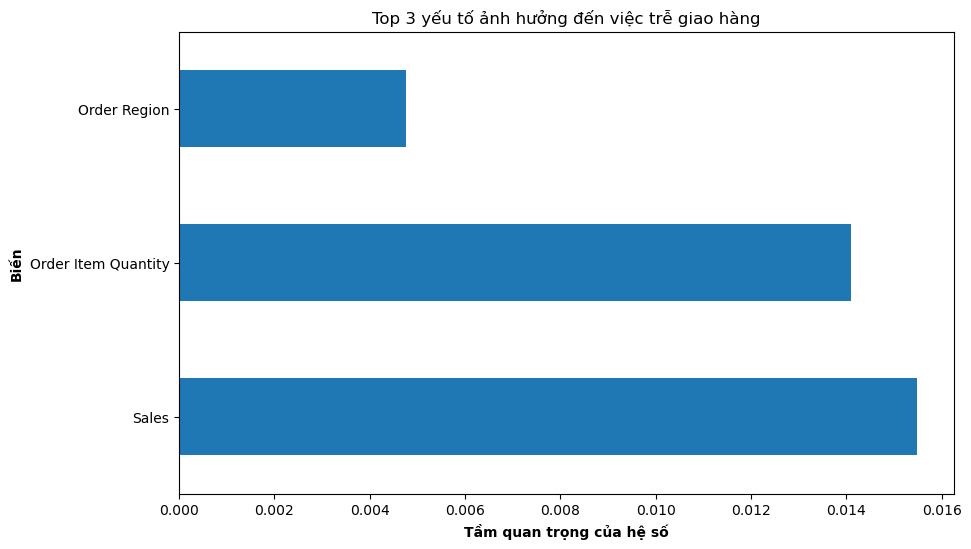

In [109]:
# Biểu đồ trực quan hóa
plt.figure(figsize=(10,6))
feature_importance.head(3).plot(kind='barh')
plt.title("Top 3 yếu tố ảnh hưởng đến việc trễ giao hàng")
plt.xlabel("Tầm quan trọng của hệ số", fontweight ="bold")
plt.ylabel("Biến", fontweight ="bold")
plt.show()